# 0. import & functions

In [1]:
import pandas as pd
import numpy as np

import PIL
import matplotlib.image as img
import matplotlib.pyplot as plt

from visual import *
from plotter import *

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Input,  MaxPooling2D, GlobalMaxPooling2D, ZeroPadding2D, AveragePooling2D, GlobalAveragePooling2D, BatchNormalization, Activation, add
from tensorflow.keras.models import Model

In [2]:
def load_data(path):
    return pd.read_csv(path)

def load_images(path, names):
    
    images= [ PIL.Image.open(path + name) for name in names ]
    #     print([i.size for i in images])
    
    return images

def images2numpy(images, size):

    output = [np.array(im.resize(size)) for im in images]
    
    output = np.array(output)
    
    return output
 
def get_images_and_preprocessing(img_size):
    
    CSV_TRAIN_PATH = "./data/train_data.csv"
    CSV_TEST_PATH = "./data/test_data.csv"
    IMG_PATH = "./data/images/"
    IMG_SIZE = (img_size,img_size)

    name_train_caption = load_data(CSV_TRAIN_PATH)
    name_test_caption = load_data(CSV_TEST_PATH)
    names_train = name_train_caption['file_name']
    names_test = name_test_caption['file_name']
    
    images_train = load_images(IMG_PATH,names_train)
    images_test = load_images(IMG_PATH,names_test)
    np_train_images = images2numpy(images_train,IMG_SIZE)
    np_test_images = images2numpy(images_test,IMG_SIZE)
    np_train_labels = [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,3,3,3,3,3,3,3,3,3,3]
    np_test_labels = [3,3,3,3,3,3,0,0,0,0,1,1,1,1,1]
    
    train_images = np_train_images / 255.
    test_images = np_test_images / 255.
    
    train_labels = to_categorical(np_train_labels, 4)
    test_labels = to_categorical(np_test_labels, 4)
    
    return train_images, test_images, train_labels, test_labels
    

# 1. MLP(다층 퍼셉트론 모델)

### 정확도 : 0.46

(28, 28, 28, 3)
<class 'numpy.ndarray'>
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 2352)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1204736   
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 1028      
Total params: 1,337,092
Trainable params: 1,337,092
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1/1 - 0s - loss: 1.6623 - accuracy: 0.3214 - val_loss: 4.3367 - val_accuracy: 0.4000
Epoch 2/10
1/1 - 0s - loss: 4.8565 - accuracy: 0.3571 - val_loss: 1.2929 - val_accuracy: 0.3333
Epoch 3/10

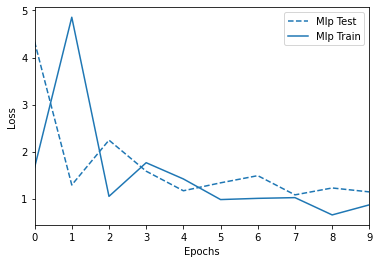

In [4]:
def MLP(img_size):
    
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(img_size, img_size, 3)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=512,activation='relu'))
    model.add(tf.keras.layers.Dense(units=256,activation='relu'))
    model.add(tf.keras.layers.Dense(units=4,activation='softmax'))
	
    return model


def main():
    
    train_images, test_images, train_labels, test_labels = get_images_and_preprocessing(28)
    
    print(train_images.shape)
    print(type(train_images))
    
    
    # 지시사항 2에서 설정한 모델을 불러옵니다.
    model = MLP(28)
    
    # 모델의 구조를 확인합니다.
    model.summary()
    
    # 컴파일러를 설정합니다.
    model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    # fit 함수를 사용하여 모델을 학습합니다.
    # 학습 수행 시 정보는 history에 저장합니다.
    history = model.fit(train_images, train_labels, epochs=10, batch_size=256,validation_data=(test_images, test_labels),verbose=2)
    
    # evaluate 함수를 사용하여 테스트 데이터의 결과값을 저장합니다.
    loss, test_acc = model.evaluate(test_images,test_labels)
    
    print('\nTest Loss : {:.4f} | Test Accuracy : {}'.format(loss, test_acc))
    print('예측한 Test Data 클래스 : ',model.predict_classes(test_images))
    
    Visulaize([('MLP', history)], 'loss')
    
    return test_acc

    
if __name__=='__main__':
    main()

# 2. CNN

### 정확도 : 0.6

(28, 28, 28, 3)
<class 'numpy.ndarray'>
Model: "sequential_153"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1143 (Conv2D)         (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d_249 (MaxPoolin (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1144 (Conv2D)         (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_250 (MaxPoolin (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_1145 (Conv2D)         (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_251 (MaxPoolin (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_161 

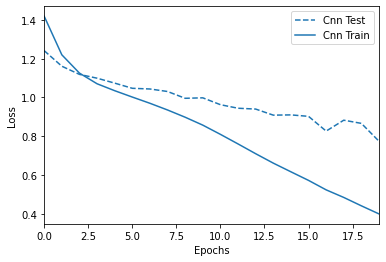

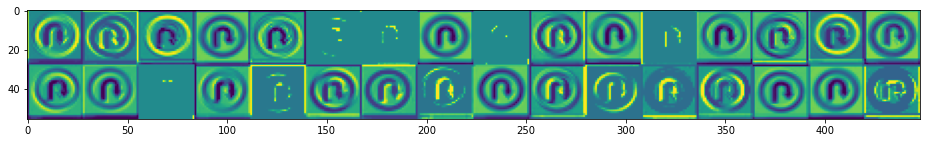

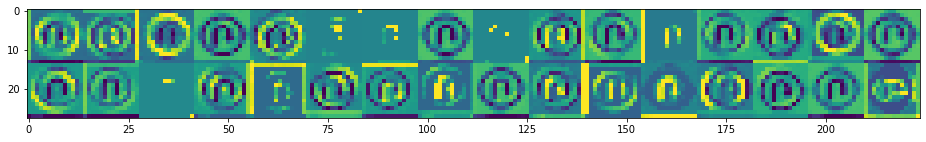

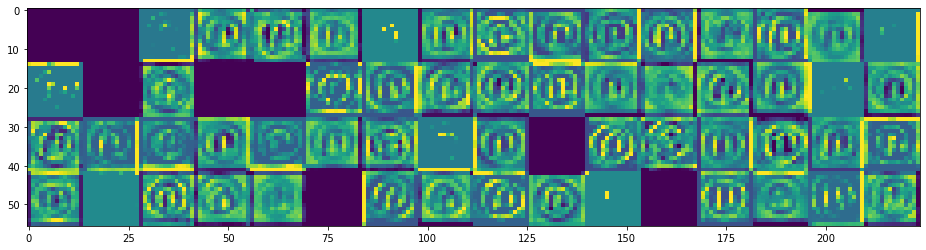

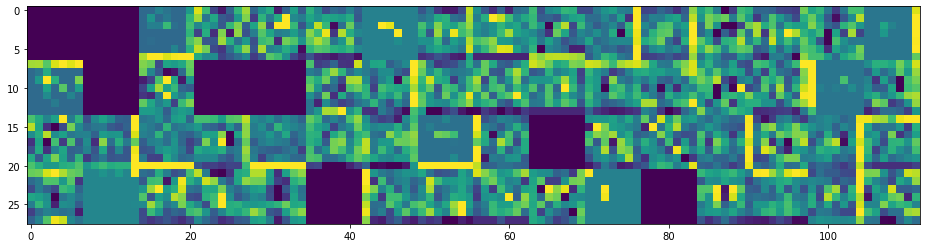

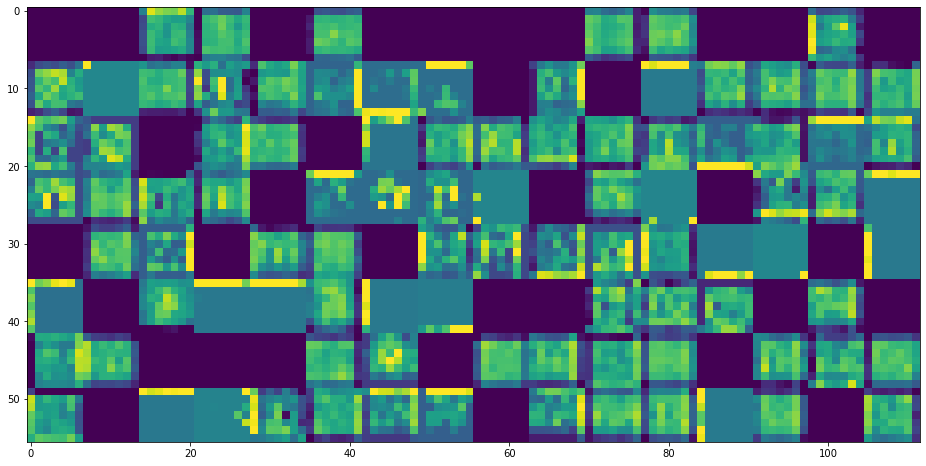

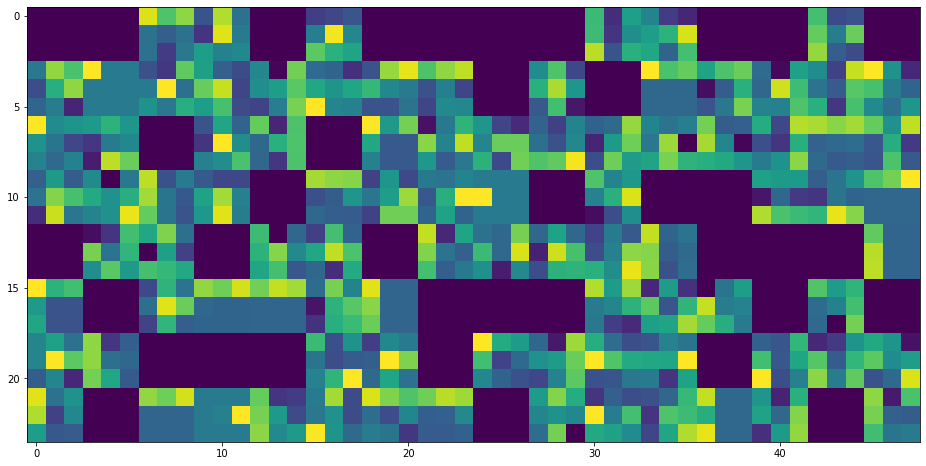

In [241]:
def CNN(img_size):

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(img_size,img_size,3)))
    
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding="SAME"))
    model.add(tf.keras.layers.MaxPool2D(2,padding="VALID"))
    
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding="SAME"))
    model.add(tf.keras.layers.MaxPool2D(2, padding="VALID"))
    
    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding="SAME"))
    model.add(tf.keras.layers.MaxPool2D(2, padding="VALID"))
    
    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(4, activation='softmax'))
    
    
    return model
    

def main():
    
    train_images, test_images, train_labels, test_labels = get_images_and_preprocessing(28)
    
    print(train_images.shape)
    print(type(train_images))
    
    
    # 지시사항 2에서 설정한 모델을 불러옵니다.
    model = CNN(28)
    
    # 모델의 구조를 확인합니다.
    model.summary()
    
    # 컴파일러를 설정합니다.
    optimizer = tf.keras.optimizers.Adam(0.001)
    model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
    
    # fit 함수를 사용하여 모델을 학습합니다.
    # 학습 수행 시 정보는 history에 저장합니다.
    history = model.fit(train_images,train_labels, epochs=20, batch_size=256, validation_data=(test_images, test_labels), verbose = 2)
    
    # evaluate 함수를 사용하여 테스트 데이터의 결과값을 저장합니다.
    loss, test_acc = model.evaluate(test_images,test_labels, verbose=2)
    
    print('\nTest Loss : {:.4f} | Test Accuracy : {}'.format(loss, test_acc))
    print('예측한 Test Data 클래스 : ',model.predict_classes(test_images))
    
    Visulaize([('CNN', history)], 'loss')
    
    Plotter(test_images, model)
    
    return test_acc

    
if __name__=='__main__':
    main()

# 3. LeNet

### 정확도 : 0.46

(28, 224, 224, 3)
<class 'numpy.ndarray'>
Model: "sequential_154"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1146 (Conv2D)         (None, 220, 220, 6)       456       
_________________________________________________________________
max_pooling2d_252 (MaxPoolin (None, 110, 110, 6)       0         
_________________________________________________________________
conv2d_1147 (Conv2D)         (None, 106, 106, 16)      2416      
_________________________________________________________________
max_pooling2d_253 (MaxPoolin (None, 53, 53, 16)        0         
_________________________________________________________________
flatten_162 (Flatten)        (None, 44944)             0         
_________________________________________________________________
dense_408 (Dense)            (None, 120)               5393400   
_________________________________________________________________
dense_409 

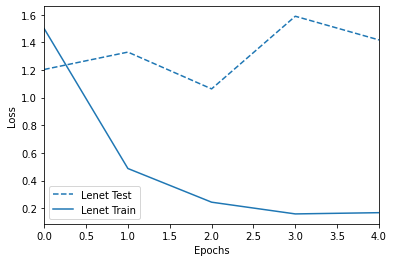

In [242]:
def LeNet(img_size):
    model = keras.Sequential()
    
    '''
    지시사항 1번
    LeNet 구조를 완성하세요.
    '''
    # Conv 1 Layer
    model.add(Conv2D(filters=6, kernel_size=5, strides=1, activation=tf.nn.relu, input_shape=(img_size,img_size,3)))
    
    # Sub Sampling Layer (Max Pooling)
    model.add(MaxPool2D(pool_size=2, strides=2))
    
    # Conv 1 Layer
    model.add(Conv2D(filters=16, kernel_size=5, strides=1, activation=tf.nn.relu, input_shape=(16,16,3)))
            
    
    # Sub Sampling Layer (Max Pooling)
    model.add(MaxPool2D(pool_size=2, strides=2))
    
    # Fully Connected (FC) Layer와 연결하기 위한 Flatten
    model.add(Flatten())
    
    # FC1 Layer 
    model.add(Dense(units=120, activation=tf.nn.relu))
    
    
    # FC2 Layer
    model.add(Dense(units=84, activation=tf.nn.relu))
    
    
    # Output Softmax
    model.add(Dense(units=4, activation=tf.nn.softmax))
    
    
    return model
    

def main():
    
    train_images, test_images, train_labels, test_labels = get_images_and_preprocessing(224)

    print(train_images.shape)
    print(type(train_images))
    
    
    # 지시사항 2에서 설정한 모델을 불러옵니다.
    model = LeNet(224)
    
    # 모델의 구조를 확인합니다.
    model.summary()
    
    # 컴파일러를 설정합니다.
    optimizer = tf.keras.optimizers.Adam(0.001)
    model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
    
    # fit 함수를 사용하여 모델을 학습합니다.
    # 학습 수행 시 정보는 history에 저장합니다.
    history = model.fit(train_images,train_labels, epochs=5, batch_size=2, validation_data=(test_images, test_labels), verbose = 2)
    
    # evaluate 함수를 사용하여 테스트 데이터의 결과값을 저장합니다.
    loss, test_acc = model.evaluate(test_images,test_labels, verbose=2)
    
    print('\nTest Loss : {:.4f} | Test Accuracy : {}'.format(loss, test_acc))
    print('예측한 Test Data 클래스 : ',model.predict_classes(test_images)[:10])
    
    Visulaize([('LeNet', history)], 'loss')
     
#     오류해결해야함
#     Plotter(test_images, model)
    
    return test_acc

    
if __name__=='__main__':
    main()

# 4. VGGNet

### 정확도 : 0.4

(28, 224, 224, 3)
<class 'numpy.ndarray'>
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv

/Users/LG/miniconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


예측한 Test Data 클래스 :  [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
레이어 이름:  conv2d
레이어 이름:  conv2d_1
레이어 이름:  max_pooling2d
레이어 이름:  conv2d_2
레이어 이름:  conv2d_3
레이어 이름:  max_pooling2d_1


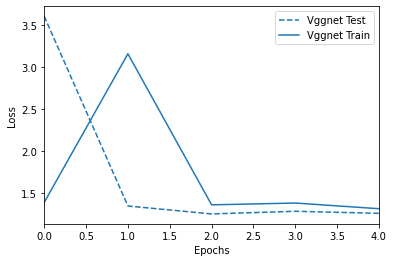

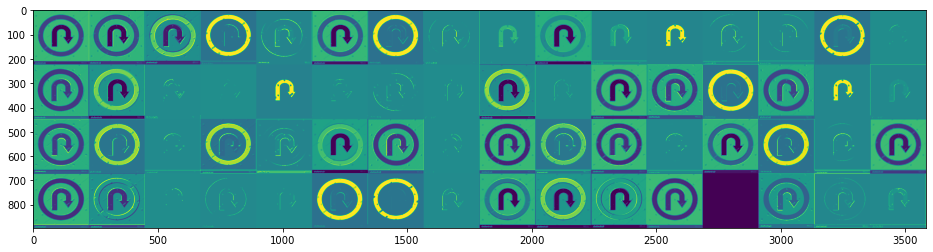

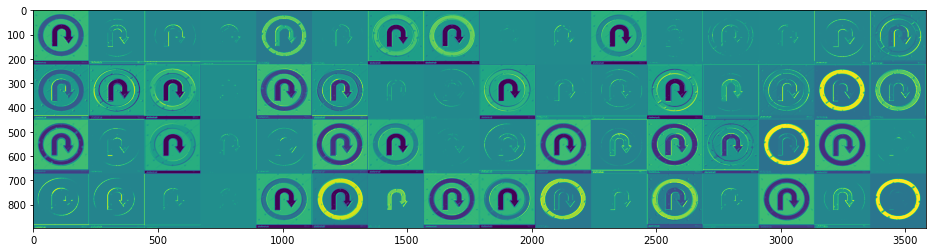

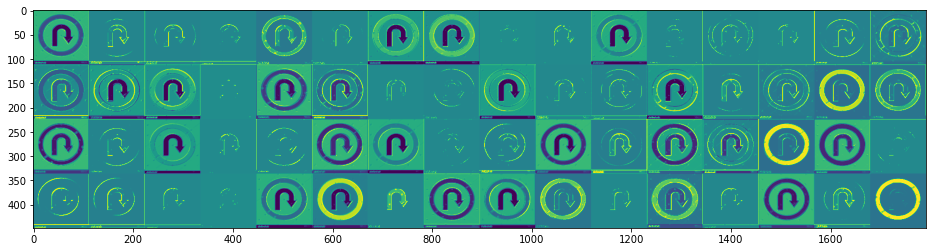

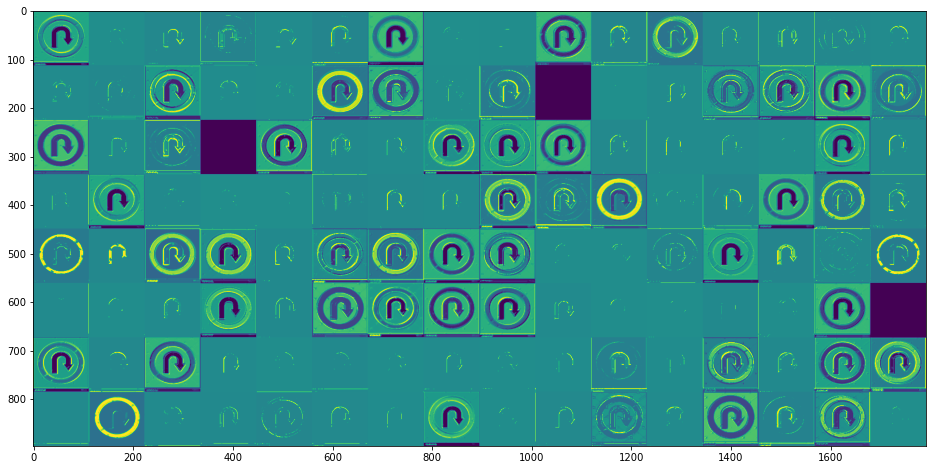

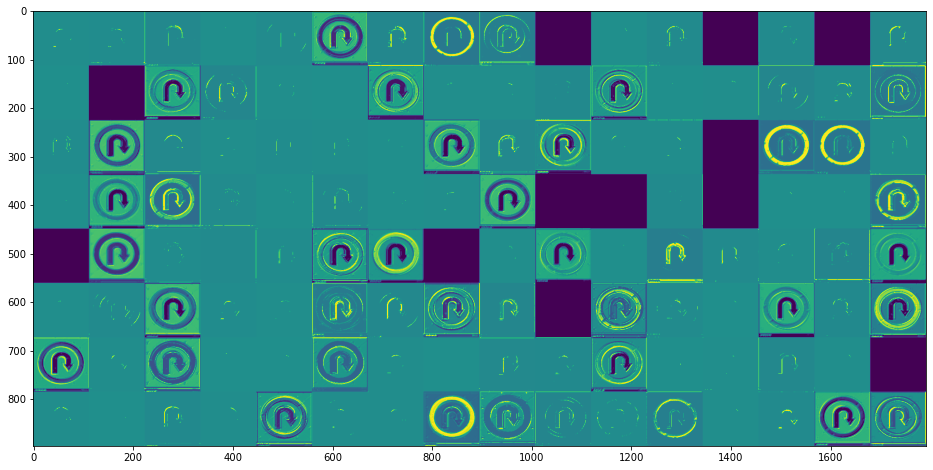

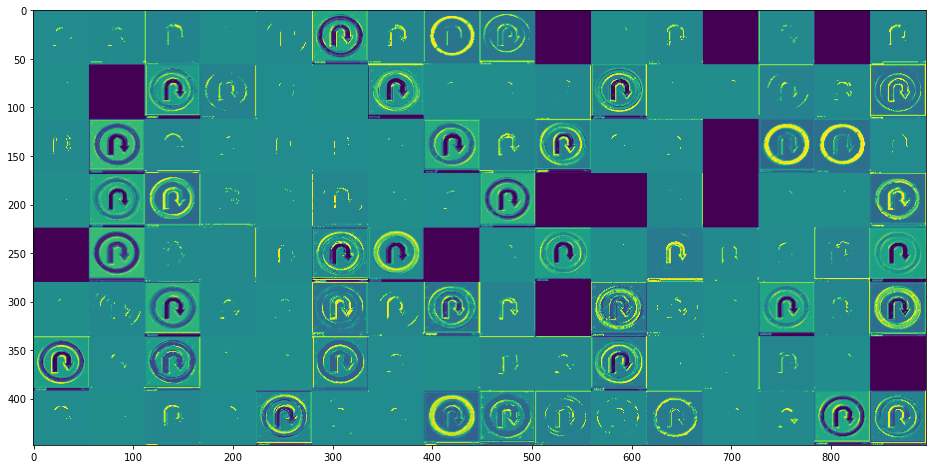

In [3]:
def conv(filters, kernel_size = 3, activation= tf.nn.relu, padding= 'same'):
    return keras.layers.Conv2D(filters = filters, kernel_size = kernel_size, activation= activation, padding= padding)

def VGG16(img_size):
    # Sequential 모델 선언
    model = keras.Sequential()
    
    '''
    지시사항 1번
    3 x 3 convolution만을 사용하여 VGG16 Net을 완성하세요.
    '''
    # 첫 번째 Conv Block
    # 입력 Shape는 ImageNet 데이터 세트의 크기와 같은 RGB 영상 (224 x 224 x 3)입니다
    model.add(Input((224, 224, 3)))
    model.add(conv(64))
    model.add(conv(64))
    model.add(keras.layers.MaxPooling2D(pool_size = 2, strides = 2))
    
    # 두 번째 Conv Block
    model.add(conv(128))
    model.add(conv(128))
    model.add(keras.layers.MaxPooling2D(pool_size = 2, strides = 2))
    
    # 세 번째 Conv Block
    model.add(conv(256))
    model.add(conv(256))
    model.add(conv(256))
    model.add(keras.layers.MaxPooling2D(pool_size = 2, strides = 2))
    
    # 네 번째 Conv Block
    model.add(conv(512))
    model.add(conv(512))
    model.add(conv(512))
    model.add(keras.layers.MaxPooling2D(pool_size = 2, strides = 2))
    
    # 다섯 번째 Conv Block
    model.add(conv(512))
    model.add(conv(512))
    model.add(conv(512))
    model.add(keras.layers.MaxPooling2D(pool_size = 2, strides = 2))
    
    # Fully Connected Layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(4096, activation= tf.nn.relu))
    model.add(keras.layers.Dense(512, activation= tf.nn.relu))
    model.add(keras.layers.Dense(4, activation= tf.nn.softmax))
    
    return model
    

def main():
    
    train_images, test_images, train_labels, test_labels = get_images_and_preprocessing(224)

    print(train_images.shape)
    print(type(train_images))
    
    
    # 지시사항 2에서 설정한 모델을 불러옵니다.
    model = VGG16(224)
    
    # 모델의 구조를 확인합니다.
    model.summary()
    
    # 컴파일러를 설정합니다.
    optimizer = tf.keras.optimizers.Adam(0.001)
    model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
    
    # fit 함수를 사용하여 모델을 학습합니다.
    # 학습 수행 시 정보는 history에 저장합니다.
    history = model.fit(train_images,train_labels, epochs=5, batch_size=256, validation_data=(test_images, test_labels), verbose = 2)
    
    # evaluate 함수를 사용하여 테스트 데이터의 결과값을 저장합니다.
    loss, test_acc = model.evaluate(test_images,test_labels, verbose=2)
    
    print('\nTest Loss : {:.4f} | Test Accuracy : {}'.format(loss, test_acc))
    print('예측한 Test Data 클래스 : ',model.predict_classes(test_images))
    
    Visulaize([('VGGNet', history)], 'loss')
     
    Plotter(test_images, model)
    
    return test_acc

    
if __name__=='__main__':
    main()

# 5. ResNet50

### 정확도 : 0.4

(28, 224, 224, 3)
<class 'numpy.ndarray'>
Model: "model_59"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_145 (InputLayer)          [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_21 (ZeroPadding2 (None, 230, 230, 3)  0           input_145[0][0]                  
__________________________________________________________________________________________________
conv2d_1373 (Conv2D)            (None, 112, 112, 64) 9472        zero_padding2d_21[0][0]          
__________________________________________________________________________________________________
batch_normalization_961 (BatchN (None, 112, 112, 64) 256         conv2d_1373[0][0]                
_________________________________________________

1/1 - 11s - loss: 1.3356 - accuracy: 0.3929 - val_loss: 182846800.0000 - val_accuracy: 0.4000
1/1 - 1s - loss: 182846800.0000 - accuracy: 0.4000

Test Loss : 182846800.0000 | Test Accuracy : 0.4000000059604645


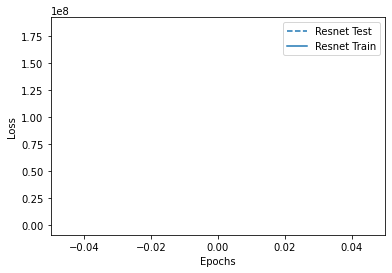

In [248]:
def identity_block(input_tensor, kernel_size, filters):
    
    filters1, filters2, filters3 = filters
    
    x = Conv2D(filters1, (1, 1))(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1))(x)
    x = BatchNormalization()(x)
    
    '''
    지시사항 1번
    아래 내용을 채워 identity_block()을 완성하세요.
    '''
    # 입력(x) : input_tensor와 F(x) : x를 더해줍니다.
    # TODO : add()와 Activation() 메서드를 사용해서 relu(F(x) + x) 의 형태로 만들어보세요. 
    x = add([x, input_tensor])
    x = Activation('relu')(x)
    return x


def residual_block(input_tensor, kernel_size, filters, strides=(2, 2)):
    filters1 , filters2 , filters3 = filters
    
    # 입력 Feature Map의 Size를 1/2로 줄이는 대신 Feature map의 Dimension을 2배로 늘려줍니다.
    x = Conv2D(filters1, (1, 1), strides=strides)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1))(x)
    x = BatchNormalization()(x)
    
    
    '''
    지시사항 2번
    아래 내용을 채워 residual_block()을 완성하세요.
    '''
    # TODO : Projection Shortcut Connection을 구현해보세요.
    # 1 x 1 Convolution 연산을 수행하여 Dimension을 2배로 증가시키고
    # 입력 Feature map의 size를 1/2로 축소시켜보세요.
    shortcut = Conv2D(filters3, (1, 1), strides=strides)(input_tensor)
    shortcut = BatchNormalization()(shortcut)

    # F(x) : x와 Shortcut Connection : shortcut을 더해줍니다.
    # TODO : add()와 Activation() 메서드를 사용해서 relu(F(x) + shortcut) 의 형태로 만들어보세요.
    x = add([x, shortcut])
    x = Activation('relu')(x)
    return x


def ResNet50(img_size):
    # 입력 이미지의 Shape을 정해줍니다.
    shape = (img_size,img_size,3)
    inputs = Input(shape)
    
    # 입력 영상의 크기를 줄이기 위한 Conv & Max-pooling
    x = ZeroPadding2D((3, 3))(inputs)
    x = Conv2D(64, (7, 7), strides=(2, 2))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)
    
    # 첫 번째 Residual Block (입력 영상 Size 2배 축소 / Dimension 2배 증가)
    x = residual_block(x, 3, [64, 64, 256], strides=(1, 1))
    x = identity_block(x, 3, [64, 64, 256])
    x = identity_block(x, 3, [64, 64, 256])
    
    
    # 두 번째 Residual Block (입력 영상 Size 2배 축소 / Dimension 2배 증가)
    x = residual_block(x, 3, [128, 128, 512])
    x = identity_block(x, 3, [128, 128, 512])
    x = identity_block(x, 3, [128, 128, 512])
    x = identity_block(x, 3, [128, 128, 512])
    
    # 세 번째 Residual Block (입력 영상 Size 2배 축소 / Dimension 2배 증가)
    x = residual_block(x, 3, [256, 256, 1024])
    x = identity_block(x, 3, [256, 256, 1024])
    x = identity_block(x, 3, [256, 256, 1024])
    x = identity_block(x, 3, [256, 256, 1024])
    x = identity_block(x, 3, [256, 256, 1024])
    x = identity_block(x, 3, [256, 256, 1024])
    
    # 네 번째 Residual Block (입력 영상 Size 2배 축소 / Dimension 2배 증가)
    x = residual_block(x, 3, [512, 512, 2048])
    x = identity_block(x, 3, [512, 512, 2048])
    x = identity_block(x, 3, [512, 512, 2048])

    # 마지막단에서 FC layer를 쓰지 않고 단순히 Averaging 합니다.
    x = AveragePooling2D((7, 7))(x)
    # x = GlobalAveragePooling2D()(x)
    x = Flatten()(x)
    # 1000개의 Class 구분
    x = Dense(4, activation='softmax')(x)
    
    # 모델 구성
    model = Model(inputs, x)
    return model

    

def main():
    
    train_images, test_images, train_labels, test_labels = get_images_and_preprocessing(224)

    print(train_images.shape)
    print(type(train_images))
    
    
    # 지시사항 2에서 설정한 모델을 불러옵니다.
    model = ResNet50(224)
    
    # 모델의 구조를 확인합니다.
    model.summary()
    
    # 컴파일러를 설정합니다.
    optimizer = tf.keras.optimizers.Adam(0.01)
    model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
    
    # fit 함수를 사용하여 모델을 학습합니다.
    # 학습 수행 시 정보는 history에 저장합니다.
    history = model.fit(train_images,train_labels, epochs=1, batch_size=512, validation_data=(test_images, test_labels), verbose = 2)
    
    # evaluate 함수를 사용하여 테스트 데이터의 결과값을 저장합니다.
    loss, test_acc = model.evaluate(test_images,test_labels, verbose=2)
    
    print('\nTest Loss : {:.4f} | Test Accuracy : {}'.format(loss, test_acc))
#     print('예측한 Test Data 클래스 : ',model.predict_classes(test_images)[:10])
    
    Visulaize([('ResNet', history)], 'loss')
     
#     Plotter(test_images, model)
    
    return test_acc

    
if __name__=='__main__':
    main()

빠름 : CNN, ResNet50     
느림 : VGGNet   